In [12]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator('data/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('data/valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


# img,labels= next(train_batch)
# print(img.shape)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

history = model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=3,steps_per_epoch=SPE ,validation_steps=VS)

histroy = model.save('models/cnnCat3.h5', overwrite=True)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
125 62
Epoch 1/3
125/125 [==============================] - 112s 898ms/step - loss: 0.2159 - accuracy: 0.9057 - val_loss: 0.0628 - val_accuracy: 0.9894
Epoch 2/3
125/125 [==============================] - 111s 885ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0157 - val_accuracy: 0.9964
Epoch 3/3
125/125 [==============================] - 107s 854ms/step - loss: 0.0249 - accuracy: 0.9927 - val_loss: 0.0026 - val_accuracy: 0.9985


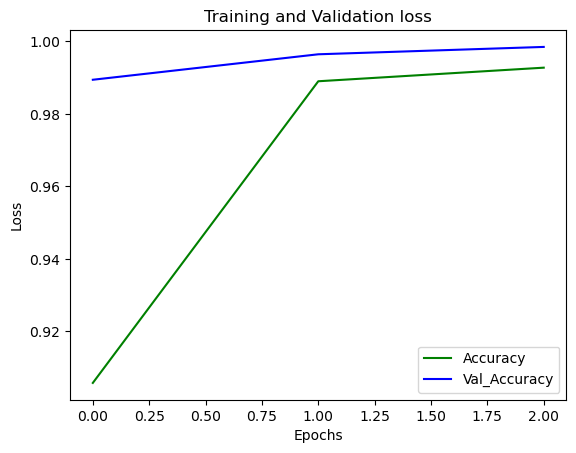

In [18]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,3)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='Val_Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

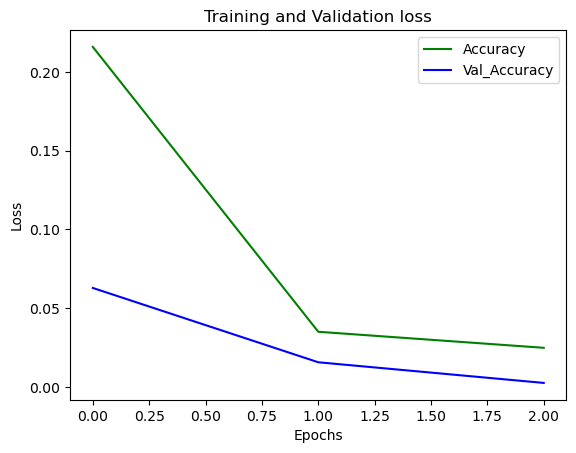

In [19]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,3)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='Val_Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()